In [3]:
%pylab inline

import LDL 
import numpy as np 
from scipy.sparse import dia_matrix
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg

import matplotlib
import matplotlib.pyplot as plt

newparams = { 'savefig.dpi': 100, 'figure.figsize': (15/2., 6/2.), 'savefig.bbox': 'tight' }
plt.rcParams.update(newparams)

#params = {'legend.fontsize': 8,
#          'legend.linewidth': 0.2}

#plt.rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib


# 70 mmHg

In [4]:
Meyer_70=np.load("Meyer_70.npz")
xMe70=Meyer_70['x']
yMe70=Meyer_70['y']



In [16]:
#                        70 mmHg
#Physiological parameters of wss and pressure
#

sim_70=LDL.LDL_simulation_4L(wss=2.5,dPmmHg=70, bc=[1,0.0047*4])
sim_70.solve_time(Nsteps=300)
points_30, c_sum_30_70=LDL.c_integrate( x0=0,  concentration=np.array(sim_70.Tlst2[2]), points=xMe70.tolist())
points, c_sum_70=LDL.c_integrate( x0=0,  concentration=sim_70.c_st2, dx=20)  




Nsteps: 300
Results saved in table Tlst.


[0, 2.0, 7.0, 9.0, 170.0]


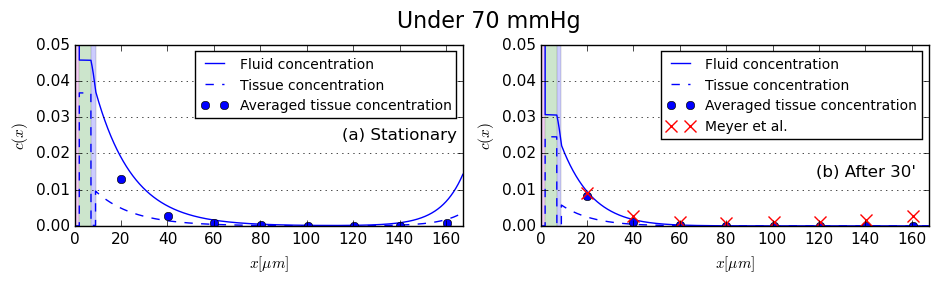

In [15]:

newparams = { 'savefig.dpi': 100, 'figure.figsize': (28/2., 15/2.), 'savefig.bbox': 'tight' }
plt.rcParams.update(newparams)
fig = plt.figure()
fig_width =  5.51 

golden_mean = (sqrt(5)-1.0)/2.0   
fig_height = fig_width*golden_mean*0.01 

params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 11, 
              'axes.titlesize':16,
              'text.fontsize': 12, 
              'legend.fontsize': 10, 
              'xtick.labelsize': 11,
              'ytick.labelsize': 11,
              'text.usetex': False,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'sans-serif',
              'figure.dpi' : 1000,
    }
matplotlib.rcParams.update(params)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2 )
fig.set_size_inches(2*5.51,2*3.51/3)


sim = sim_70
i1 = 0
i1,i2 = int(0/sim.l*sim.N),int(170/sim.l*sim.N)
L           = sim.pars.L
d=[0]+np.cumsum(L).tolist()
print d
colors=['m','g','b','w']
for i,(l1,l2) in enumerate(zip(d[:],d[1:])):      
    ax1.bar([l1,],5,l2-l1, color=colors[i], linewidth=0.3,  alpha=0.2)
    ax2.bar([l1,],5,l2-l1, color=colors[i], linewidth=0.3,  alpha=0.2)


ax1.plot(sim_70.x,sim_70.c_st,ls='-',linewidth=1, color ="blue",  label="Fluid concentration")
ax1.plot(sim_70.x,sim_70.c_st2,ls='--',linewidth=1, color ="blue",  label="Tissue concentration")
ax1.plot(xMe70,c_sum_70, 'bo', ms=6, label="Averaged tissue concentration")

plt.suptitle("Under 70 mmHg", y=1.05,fontsize=16)

ax1.grid(True,axis='y', which='major')
ax1.set_xlabel("$x [\mu m]$", fontsize=11)
ax1.set_ylabel("$c(x)$", fontsize=11)
ax2.grid(True,axis='y', which='major')
ax2.set_xlabel("$x [\mu m]$", fontsize=11)
ax2.set_ylabel("$c(x)$", fontsize=11)
ax1.axis([0,167.3,0,0.05])
ax2.axis([0,167.3,0,0.05])

plot(sim_70.x,sim_70.Tlst[2],ls='-',linewidth=1, color ="blue",  label="Fluid concentration")
plot(sim_70.x,sim_70.Tlst2[2],ls='--',linewidth=1, color ="blue",  label="Tissue concentration")
plot(xMe70,c_sum_30_70, 'bo', ms=6, label="Averaged tissue concentration")
plot(xMe70,yMe70, 'rx', ms=8, mew =1, label="Meyer et al.")

ax1.legend().get_frame().set_alpha(1.0)
ax2.legend().get_frame().set_alpha(1.0)
ax1.text(140, 0.025,'(a) Stationary',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)
ax2.text(140, 0.015,"(b) After 30'",
     horizontalalignment='center',
     verticalalignment='center', 
     fontsize=12)
savefig('70mmHg.pdf')  

# 160 mmHg

In [7]:
Meyer_160=np.load("Meyer_160.npz")
xMe160=Meyer_160['x']
yMe160=Meyer_160['y']

Curmi_160=np.load("Curmi_160.npz")
xC160=Curmi_160['x']
yC160=Curmi_160['y']

Curmi_160_30=np.load("Curmi_160_30min.npz")
xC160_30=Curmi_160_30['x']
yC160_30=Curmi_160_30['y']

Curmi_160_5=np.load("Curmi_160_5min.npz")
xC160_5=Curmi_160_5['x']
yC160_5=Curmi_160_5['y']




In [8]:
sim_160=LDL.LDL_simulation_4L(wss=2.5,dPmmHg=160, bc=[1,0.019*4], phi_max=0.011)
sim_160.solve_time(Nsteps=500)
points_160_30, c_sum_160_30=LDL.c_integrate( x0=0,  concentration=np.array(sim_160.Tlst2[2]), points=xMe160.tolist())
points_160_1h, c_sum_160_1h=LDL.c_integrate( x0=0,  concentration=np.array(sim_160.Tlst2[4]), points=xC160.tolist())
c_05h = sim_160.Tlst[2]
c_1h = sim_160.Tlst[4]
sim_160.solve_time(Nsteps=200, dt=3)
points_160_5min, c_sum_160_5min=LDL.c_integrate( x0=0,  concentration=np.array(sim_160.Tlst2[1]), points=xC160_5.tolist())
points_160_st, c_sum_160_st=LDL.c_integrate( x0=0,  concentration=np.array(sim_160.c_st2), points=xC160.tolist())


sim_160_phi=LDL.LDL_simulation_4L(wss=2.5,dPmmHg=160, bc=[1,0.019*4],  phi_max=5e-4)
sim_160_phi.solve_time(Nsteps=500)
points_160_30_phi, c_sum_160_30_phi=LDL.c_integrate( x0=0,  
                                                    concentration=np.array(sim_160_phi.Tlst2[2]), points=xMe160.tolist())
points_160_1h_phi, c_sum_160_1h_phi=LDL.c_integrate( x0=0,  
                                                    concentration=np.array(sim_160_phi.Tlst2[4]), points=xC160.tolist())
c_05h_phi = sim_160_phi.Tlst[2]
c_1h_phi = sim_160_phi.Tlst[4]
sim_160_phi.solve_time(Nsteps=200, dt=3)
points_160_5min_phi, c_sum_160_5min_phi=LDL.c_integrate( x0=0, 
                                                        concentration=np.array(sim_160_phi.Tlst2[1]), points=xC160_5.tolist())
points_160_st_phi, c_sum_160_st_phi=LDL.c_integrate( x0=0, 
                                                    concentration=np.array(sim_160_phi.c_st2), points=xC160.tolist())


Nsteps: 500
Results saved in table Tlst.
Nsteps: 200
Results saved in table Tlst.
Nsteps: 500
Results saved in table Tlst.
Nsteps: 200
Results saved in table Tlst.


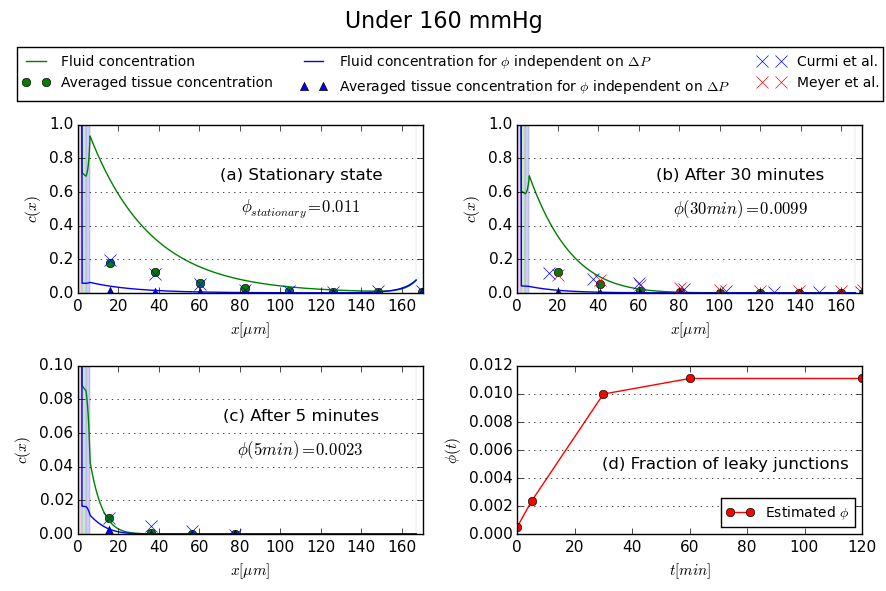

In [9]:
x_list = [0, 5, 30, 60, 120]
y_list = [0.000483806767739,0.0022*1.028*1.03,0.0089*1.028*1.09,  0.0107826845403*1.028,  0.0107826845403*1.028]


newparams = { 'savefig.dpi': 100, 'figure.figsize': (18/2., 10/2.), 'savefig.bbox': 'tight' }
plt.rcParams.update(newparams)
fig = plt.figure()
fig.subplots_adjust(left=0.3, wspace=0.4)
fig_width =  5.51 

golden_mean = (sqrt(5)-1.0)/2.0    
fig_height = fig_width*golden_mean 
params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 9, 
              'axes.titlesize':12,
              'text.fontsize': 8, 
              'legend.fontsize': 8, 
              'xtick.labelsize': 9,
              'ytick.labelsize': 9,
              'text.usetex': False,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'sans-serif',
              'figure.dpi' : 1000,
    }
ax1 = fig.add_subplot(2,2,1)


sim = sim_160
i1 = 0
i1,i2 = int(0/sim.l*sim.N),int(170/sim.l*sim.N)
L           = sim.pars.L
d=[0]+np.cumsum(L).tolist()
colors=['m','g','b','w']   

ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


for i,(l1,l2) in enumerate(zip(d[:],d[1:])):      
    ax2.bar([l1,],5,l2-l1, color=colors[i], linewidth=0.3,  alpha=0.2)
    ax3.bar([l1,],5,l2-l1, color=colors[i], linewidth=0.3,  alpha=0.2)
    
sim = sim_160
i1 = 0
i1,i2 = int(0/sim.l*sim.N),int(170/sim.l*sim.N)
L           = sim.pars.L
d=[0]+np.cumsum(L).tolist()
colors=['m','g','b','w']
for i,(l1,l2) in enumerate(zip(d[:],d[1:])):      
    ax1.bar([l1,],5,l2-l1, color=colors[i], linewidth=0.3,  alpha=0.2)    
    
b1, = ax1.plot(points_160_st,c_sum_160_st, 'go', label="$\phi(dP) = 0.01$: averaged tissue concentration ")
a1, = ax1.plot(sim_160.x,sim_160.c_st,ls='-',linewidth=1, color ="green",  
               label="$\phi(dP) = 0.01$: fluid concentration")
d1, = ax1.plot(points_160_st_phi,c_sum_160_st_phi, 'b^', 
               label="$\phi$ independent on dP: averaged tissue concentration")
c1, = ax1.plot(sim_160_phi.x,sim_160_phi.c_st,ls='-',linewidth=1, color ="blue",  
               label="$\phi$ independent on dP: fluid concentration")
e1, = ax1.plot(xC160,yC160, 'bx', ms=8, label="Curmi et al.") 


b2, = ax2.plot(points_160_30, c_sum_160_30,'go', label="Averaged tissue concentration" )
a2, = ax2.plot(sim_160.x,c_05h,color='green', label="Fluid concentration")
d2, = ax2.plot(points_160_30_phi,c_sum_160_30_phi, 'b^', 
               label="$\phi$ independent on dP: averaged tissue concentration")
c2,= ax2.plot(sim_160_phi.x,c_05h_phi,ls='-',linewidth=1, color ="blue", 
              label="$\phi$ independent on dP: fluid concentration")
f1, = ax2.plot(xMe160,yMe160, 'rx', ms=8, label="Meyer et al.")
ax2.plot(xC160_30,yC160_30, 'bx', ms=8, label="Curmi et al.")


b3, = ax3.plot(points_160_5min, c_sum_160_5min,'go', label="Averaged tissue concentration" )
a3, = ax3.plot(sim_160.x,sim_160.Tlst[1],color='green', label="Fluid concentration")
d3, = ax3.plot(points_160_5min_phi,c_sum_160_5min_phi, 'b^', 
               label="$\phi$ independent on dP: averaged tissue concentration")
c3, = ax3.plot(sim_160_phi.x,sim_160_phi.Tlst[1],ls='-',linewidth=1, color ="blue",  
               label="$\phi$ independent on dP: fluid concentration")
ax3.plot(xC160_5,yC160_5, 'bx', ms=8, label="Curmi et al.")

ax4.plot(x_list, y_list, 'ro-', label = "Estimated $\phi$")


ax1.axis([0,170.3,0,1.00])
ax2.axis([0,170.3,0,1.00])
ax3.axis([0,170.3,0,0.10])

plt.suptitle("Under 160 mmHg", y=1.18, fontsize=16)

ax1.grid(True,axis='y', which='major')
ax1.set_xlabel("$x[\mu m]$", fontsize=11)
ax1.set_ylabel("$c(x)$", fontsize=11)
ax2.grid(True,axis='y', which='major')
ax2.set_xlabel("$x[\mu m]$", fontsize=11)
ax2.set_ylabel("$c(x)$", fontsize=11)
ax3.grid(True,axis='y', which='major')
ax3.set_xlabel("$x[\mu m]$", fontsize=11)
ax3.set_ylabel("$c(x)$", fontsize=11)
ax4.grid(True,axis='y', which='major')
ax4.set_xlabel("$t[min]$", fontsize=11)
ax4.set_ylabel("$\phi(t)$", fontsize=11)
b=[]

ax1.text(110, 0.7,'(a) Stationary state',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)
ax1.text(110, 0.5,'$\phi_{stationary}=0.011$',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)

ax2.text(110, 0.7,'(b) After 30 minutes',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)
ax2.text(110, 0.5,'$\phi(30min)=0.0099$',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)
ax3.text(110, 0.07,'(c) After 5 minutes',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)
ax3.text(110, 0.05,'$\phi(5 min)=0.0023$',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)
ax4.text(115, 0.005,'(d) Fraction of leaky junctions',
     horizontalalignment='right',
     verticalalignment='center',
     fontsize=12)
ax4.legend(loc=4).get_frame().set_alpha(1.0)

fig.legend((a1,b1, c1, d1,e1, f1), ("Fluid concentration", "Averaged tissue concentration",
                                    "Fluid concentration for $\phi$ independent on $\Delta P$",
                         "Averaged tissue concentration for $\phi$ independent on $\Delta P$", "Curmi et al.", 
                                    "Meyer et al."), 
           ncol=3, fontsize=10, bbox_to_anchor=(0., 1.0, 1., .102), loc=9)

plt.tight_layout()
savefig('160mmHg4Plots.pdf')  

# 120 mmHg

In [10]:
Meyer_120=np.load("Meyer_120.npz")
xMe120=Meyer_120['x']
yMe120=Meyer_120['y']

In [11]:


sim_120=LDL.LDL_simulation_4L(wss=2.5,dPmmHg=120,  bc=[1,0.019*4], phi_max=0.0062)
sim_120.solve_time(Nsteps=300)
points_120, c_sum_120=LDL.c_integrate( x0=0,  concentration=np.array(sim_120.c_st2), points=xMe120.tolist())
points_120_30, c_sum_120_30=LDL.c_integrate( x0=0,  concentration=np.array(sim_120.Tlst2[2]), points=xMe120.tolist())


sim_120_phi=LDL.LDL_simulation_4L(wss=2.5,dPmmHg=120, bc=[1,0.019*4])
sim_120_phi.solve_time(Nsteps=300)
points_phi, c_sum_120_phi=LDL.c_integrate( x0=0,  concentration=np.array(sim_120_phi.c_st2), points=xMe120.tolist())
points_120_30_phi, c_sum_120_30_phi=LDL.c_integrate( x0=0,  concentration=np.array(sim_120_phi.Tlst2[2]), points=xMe120.tolist())


Nsteps: 300
Results saved in table Tlst.
Nsteps: 300
Results saved in table Tlst.


[0, 2.0, 4.3, 6.3, 167.3]


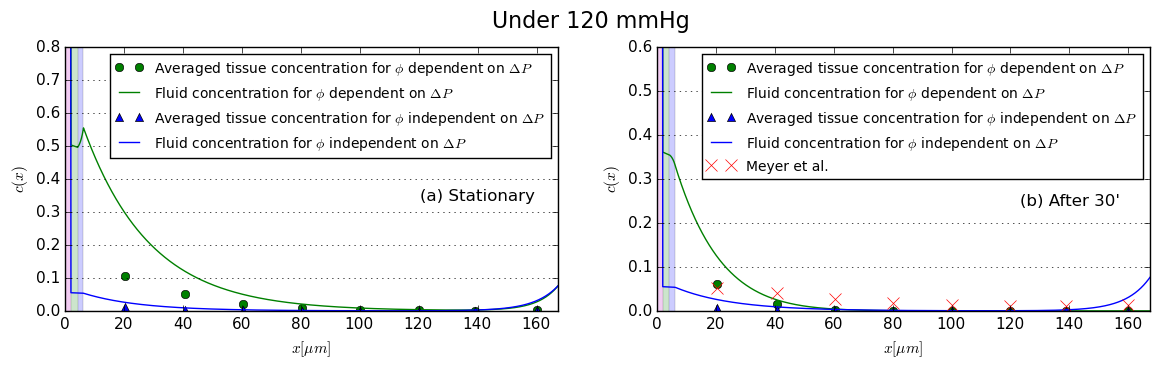

In [12]:

newparams = { 'savefig.dpi': 100, 'figure.figsize': (28/2., 15/2.), 'savefig.bbox': 'tight' }
plt.rcParams.update(newparams)
fig = plt.figure()
fig_width =  5.51 
golden_mean = (sqrt(5)-1.0)/2.0    
fig_height = fig_width*golden_mean*0.5 

params = {'figure.figsize': [fig_width, fig_height] }
matplotlib.rcParams.update(params)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)


sim = sim_120
i1 = 0
i1,i2 = int(0/sim.l*sim.N),int(170/sim.l*sim.N)
L           = sim.pars.L
d=[0]+np.cumsum(L).tolist()
print d
colors=['m','g','b','w']
for i,(l1,l2) in enumerate(zip(d[:],d[1:])):      
    ax1.bar([l1,],5,l2-l1, color=colors[i], linewidth=0.3,  alpha=0.2)
    ax2.bar([l1,],5,l2-l1, color=colors[i], linewidth=0.3,  alpha=0.2)

    
ax1.plot(xMe120,c_sum_120, 'go', label="Averaged tissue concentration for $\phi$ dependent on $\Delta P$")
ax1.plot(sim_120.x,sim_120.c_st,ls='-',linewidth=1, color ="green",  label="Fluid concentration for $\phi$ dependent on $\Delta P$")
ax1.plot(xMe120,c_sum_120_phi, 'b^', label="Averaged tissue concentration for $\phi$ independent on $\Delta P$")
ax1.plot(sim_120_phi.x,sim_120_phi.c_st,ls='-',linewidth=1, color ="blue", 
                            label="Fluid concentration for $\phi$ independent on $\Delta P$")

plt.suptitle("Under 120 mmHg", y=0.95,fontsize=16)
ax1.grid(True,axis='y', which='major')
ax1.set_xlabel("$x [\mu m]$", fontsize=11)
ax1.set_ylabel("$c(x)$", fontsize=11)
ax2.grid(True,axis='y', which='major')
ax2.set_xlabel("$x [\mu m]$", fontsize=11)
ax2.set_ylabel("$c(x)$", fontsize=11)
ax1.axis([0,167.3,0,0.8])
ax2.axis([0,167.3,0,0.6])


ax2.plot(points_120_30, c_sum_120_30,'go', label="Averaged tissue concentration for $\phi$ dependent on $\Delta P$" )
ax2.plot(sim_120.x,sim_120.Tlst[2],color='green', label="Fluid concentration for $\phi$ dependent on $\Delta P$")
ax2.plot(points_120_30_phi,c_sum_120_30_phi, 'b^', label="Averaged tissue concentration for $\phi$ independent on $\Delta P$")
ax2.plot(sim_120_phi.x,sim_120_phi.c_st,ls='-',linewidth=1, color ="blue",  label="Fluid concentration for $\phi$ independent on $\Delta P$")
ax2.plot(xMe120,yMe120, 'rx', ms=8, label="Meyer et al.")


ax1.legend().get_frame().set_alpha(1.0)
ax2.legend().get_frame().set_alpha(1.0)
ax1.text(140, 0.35,'(a) Stationary',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=12)
ax2.text(140, 0.25,"(b) After 30'",
     horizontalalignment='center',
     verticalalignment='center', 
     fontsize=12)
savefig('120mmHg.pdf')  

# Summary

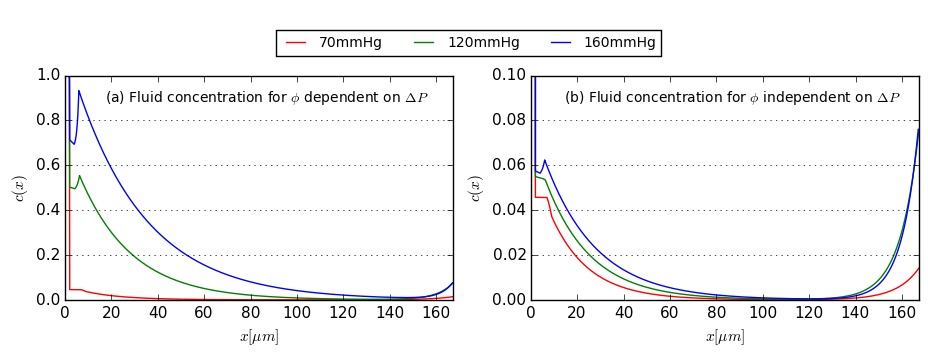

In [13]:


newparams = { 'savefig.dpi': 100, 'figure.figsize': (28/2., 15/2.), 'savefig.bbox': 'tight' }
plt.rcParams.update(newparams)

golden_mean = (sqrt(5)-1.0)/2.0   
fig_height = fig_width*golden_mean

params = { 'figure.figsize': [2*fig_width, 0.85*fig_height], }
matplotlib.rcParams.update(params)

fig = plt.figure()


ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sim = sim_70
i1 = 0
i1,i2 = int(0/sim.l*sim.N),int(170/sim.l*sim.N)
L           = sim.pars.L
d=[0]+np.cumsum(L).tolist()
colors=['m','g','b','w']
a1,= ax1.plot(sim_70.x,sim_70.c_st,ls='-',linewidth=1, color ="red",  label="70 mmHg")
a1, = ax2.plot(sim_70.x,sim_70.c_st,ls='-',linewidth=1, color ="red",  label="70 mmHg")
a2, = ax1.plot(sim_120.x,sim_120.c_st,ls='-',linewidth=1, color ="green",  label="120 mmHg")
ax2.plot(sim_120_phi.x,sim_120_phi.c_st,ls='-',linewidth=1, color ="green",  label="120 mmHg")
a3, = ax1.plot(sim_160.x,sim_160.c_st,ls='-',linewidth=1, color ="blue",  label="160 mmHg")
ax2.plot(sim_160_phi.x,sim_160_phi.c_st,ls='-',linewidth=1, color ="blue",  label="160 mmHg")

ax1.grid(True,axis='y', which='major')
ax1.set_xlabel("$x [\mu m]$", fontsize=11)
ax1.set_ylabel("$c(x)$", fontsize=11)
ax2.grid(True,axis='y', which='major')
ax2.set_xlabel("$x [\mu m]$", fontsize=11)
ax2.set_ylabel("$c(x)$", fontsize=11)
ax1.axis([0,167.3,0,1.0])
ax2.axis([0,167.3,0,0.1])

ax1.text(87, 0.9,'(a) Fluid concentration for $\phi$ dependent on $\Delta P$',
     horizontalalignment='center',
     verticalalignment='center',
     fontsize=10)

ax2.text(87, 0.09,"(b) Fluid concentration for $\phi$ independent on $\Delta P$",#60, 0.73,"(b) After 30'",
     horizontalalignment='center',
     verticalalignment='center', 
     fontsize=10)

fig.legend((a1,a2,a3), ("70mmHg", "120mmHg","160mmHg"), ncol=3,
           fontsize=10, bbox_to_anchor=(0., 1.05, 0.85, .102), loc=9)

savefig('Pressure.pdf')  

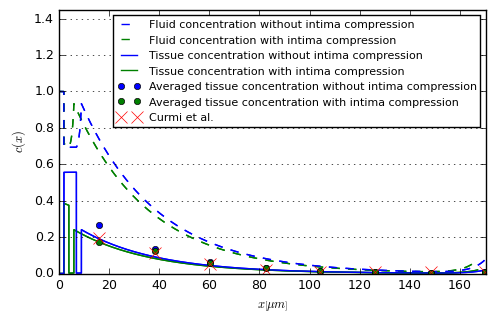

In [14]:
sim06=LDL.LDL_simulation_4L(wss=2.5,dPmmHg=160, bc=[1,0.019*4], phi_max=0.011)

fig_width =  5.51

golden_mean = (sqrt(5)-1.0)/2.0  
fig_height = fig_width*golden_mean 

params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 9, 
              'axes.titlesize': 9,
              'text.fontsize': 8,
              'legend.fontsize': 8, 
              'xtick.labelsize': 9,
              'ytick.labelsize': 9,
              'text.usetex': False,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'sans-serif',
              'figure.dpi' : 1000,
    }
matplotlib.rcParams.update(params)
sim06_phi=LDL.LDL_simulation_4L(wss=2.5,dPmmHg=160, bc=[1,0.019*4], phi_max=0.011, compressed=False)

sim06.plot_c(yrange=(0,1.1),xrange=(0,214), kolor='green', alpha=0.0, style='--',linewidths=1.0)
plot(sim06_phi.x,sim06_phi.c_st,ls='--',linewidth=1, color ="blue",  label="Fluid concentration without intima compression")
plot(sim06.x,sim06.c_st,ls='--',linewidth=1, color ="green",  label="Fluid concentration with intima compression")
plot(sim06_phi.x,sim06_phi.c_st2,ls='-',linewidth=1, color ="blue",  label="Tissue concentration without intima compression")
plot(sim06.x,sim06.c_st2,ls='-',linewidth=1, color ="green",  label="Tissue concentration with intima compression")

sim06_phi.plot_c(yrange=(0,1.1),xrange=(0,214), kolor='blue', alpha=0.0, style='--',linewidths=1.0)
sim06.plot_c2(yrange=(0,1.1),xrange=(0,214), kolor='green', alpha=0.0, style='-',linewidths=1.0)
sim06_phi.plot_c2(yrange=(0,1.1),xrange=(0,214), kolor='blue', alpha=0.0, style='-',linewidths=1.0)
points, c_sum06=LDL.c_integrate( x0=0,  concentration=sim06.c_st2, points=xC160.tolist())
points, c_sum06_phi=LDL.c_integrate( x0=0,  concentration=sim06_phi.c_st2, points=xC160.tolist())
plot(xC160,c_sum06_phi, 'bo', ms=5, label="Averaged tissue concentration without intima compression")
plot(xC160,c_sum06, 'go', ms=5, label="Averaged tissue concentration with intima compression")
plot(xC160,yC160, 'rx', ms=8, label="Curmi et al.")



axis([0,170.3,0,1.45])
legend().get_frame().set_alpha(1.0)
savefig('160mmHgCompression.pdf')  